# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

628

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"


# Build partial query URL
query_url = url + "appid=" + weather_api_key + "&q=" + city
response = requests.get(query_url).json()
pprint(response)

{'base': 'stations',
 'clouds': {'all': 96},
 'cod': 200,
 'coord': {'lat': 7.9986, 'lon': 124.2928},
 'dt': 1661823859,
 'id': 1701054,
 'main': {'feels_like': 301.76,
          'grnd_level': 932,
          'humidity': 63,
          'pressure': 1010,
          'sea_level': 1010,
          'temp': 300.37,
          'temp_max': 300.37,
          'temp_min': 300.37},
 'name': 'Marawi',
 'sys': {'country': 'PH', 'sunrise': 1661808916, 'sunset': 1661853146},
 'timezone': 28800,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 355, 'gust': 1.82, 'speed': 1.59}}


In [4]:
lat = []
lng = []
cloud = []
date = []
humidity = []
max_temp = []
min_temp = []
wind_speed = []
name = []
country = []
query_url = url + "appid=" + weather_api_key + "&q=" + city
count= 0
for city in cities:
    try:
        query_url = url + "appid=" + weather_api_key + "&q=" + city
        response = requests.get(query_url).json()
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        cloud.append(response["clouds"]["all"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        min_temp.append(response["main"]["temp_min"])
        name.append(response["name"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        print(f"successfully collected {city}")
    except:
        print(f"falied to retrieve: {city}")
        pass

successfully collected bathsheba
successfully collected kalmunai
successfully collected ribeira grande
successfully collected mar del plata
successfully collected hobart
successfully collected mataura
successfully collected rikitea
successfully collected airai
successfully collected hyeres
successfully collected cape town
successfully collected bredasdorp
successfully collected pimentel
successfully collected kaliua
successfully collected souillac
successfully collected kulhudhuffushi
successfully collected katsuura
successfully collected yongchang
successfully collected kapaa
falied to retrieve: abu jubayhah
successfully collected filingue
successfully collected rypefjord
successfully collected tahoua
successfully collected moose factory
successfully collected bluff
falied to retrieve: temaraia
successfully collected egvekinot
successfully collected port hueneme
successfully collected atasu
successfully collected yellowknife
successfully collected arraial do cabo
successfully collecte

successfully collected kropotkin
successfully collected lac du bonnet
successfully collected barcelona
successfully collected pevek
falied to retrieve: mrirt
successfully collected half moon bay
successfully collected kichera
successfully collected saint-augustin
successfully collected leningradskiy
successfully collected palizada
successfully collected shishou
successfully collected ilulissat
successfully collected bardiyah
successfully collected hasaki
successfully collected portmore
successfully collected ondjiva
successfully collected springbok
successfully collected pitkyaranta
successfully collected namatanai
falied to retrieve: louisbourg
successfully collected naliya
successfully collected kiunga
falied to retrieve: tuggurt
successfully collected itacoatiara
successfully collected christchurch
successfully collected itarema
successfully collected buala
successfully collected sechura
successfully collected nanortalik
successfully collected ponta delgada
successfully collected yu

successfully collected jiayuguan
successfully collected snezhnogorsk
successfully collected quelimane
successfully collected oskaloosa
successfully collected guskhara
successfully collected lasa
successfully collected emba
successfully collected cairns
successfully collected adeje
successfully collected bondo
successfully collected dumas
successfully collected mudigere
successfully collected kurilsk
successfully collected jeremie
successfully collected urumqi
successfully collected garowe
successfully collected phalombe
successfully collected terney
successfully collected tarquinia
successfully collected oranjestad
successfully collected ust-kuyga
falied to retrieve: tumannyy
successfully collected seymchan
falied to retrieve: marcona
successfully collected westerland
successfully collected puerto suarez
falied to retrieve: sorvag
successfully collected porto santo
successfully collected amahai
successfully collected apricena
successfully collected yashan
successfully collected gizo
su

In [29]:
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=76636c575a0a971e31a0122000f89ff3&q=kaitangata


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [29]:
weather_df = pd.DataFrame({"City" : name, 
             "Lat": lat,
             "Lng": lng,
             "Max Temp": max_temp,
             "Humidity": humidity, 
             "Cloudiness":cloud,
             "Wind Speed" :wind_speed,
             "Country": country,
             "Date": date})
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bathsheba,13.2167,-59.5167,301.49,83,75,6.69,BB,1661823863
1,Kalmunai,7.4167,81.8167,300.81,73,99,1.75,LK,1661823863
2,Ribeira Grande,38.5167,-28.7000,296.80,88,12,0.74,PT,1661823863
3,Mar del Plata,-38.0023,-57.5575,283.08,69,0,6.26,AR,1661823613
4,Hobart,-42.8794,147.3294,286.07,95,75,4.63,AU,1661823679
...,...,...,...,...,...,...,...,...,...
578,Chapais,49.7834,-74.8492,292.03,99,97,1.43,CA,1661824060
579,Muros,42.7762,-9.0603,290.84,90,64,2.48,ES,1661824061
580,Chu,43.5983,73.7614,293.15,29,0,1.87,KZ,1661824061
581,Pindi Gheb,33.2402,72.2661,301.93,67,0,3.46,PK,1661824061


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [30]:
#  Get the indices of cities that have humidity over 100%.
humidity_df = weather_df.loc[weather_df["Humidity"]>100]

humidity_df

#no cities with the humdidity gereater than 100

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [31]:
low_humidity_df= weather_df.loc[weather_df["Humidity"]<100]
low_humidity_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bathsheba,13.2167,-59.5167,301.49,83,75,6.69,BB,1661823863
1,Kalmunai,7.4167,81.8167,300.81,73,99,1.75,LK,1661823863
2,Ribeira Grande,38.5167,-28.7000,296.80,88,12,0.74,PT,1661823863
3,Mar del Plata,-38.0023,-57.5575,283.08,69,0,6.26,AR,1661823613
4,Hobart,-42.8794,147.3294,286.07,95,75,4.63,AU,1661823679
...,...,...,...,...,...,...,...,...,...
578,Chapais,49.7834,-74.8492,292.03,99,97,1.43,CA,1661824060
579,Muros,42.7762,-9.0603,290.84,90,64,2.48,ES,1661824061
580,Chu,43.5983,73.7614,293.15,29,0,1.87,KZ,1661824061
581,Pindi Gheb,33.2402,72.2661,301.93,67,0,3.46,PK,1661824061


In [32]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

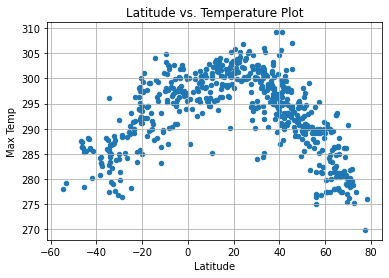

<Figure size 432x288 with 0 Axes>

In [85]:
weather_df.plot(kind = "scatter", x = "Lat", y = "Max Temp", grid=True)
plt.title("Latitude vs. Temperature Plot")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

plt.show()
plt.savefig("Latitude_vs_Temperature_Plot.png")

The Latitude vs. Temperature Plot is non linear. 

## Latitude vs. Humidity Plot

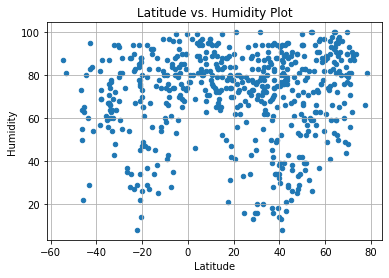

<Figure size 432x288 with 0 Axes>

In [84]:
weather_df.plot(kind = "scatter", x = "Lat", y = "Humidity",grid=True)
plt.title("Latitude vs. Humidity Plot")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()
plt.savefig("Latitude_vs_Humidity_Plot.png")

The Latitude vs. Humidity Plot shows no relationship. 

## Latitude vs. Cloudiness Plot

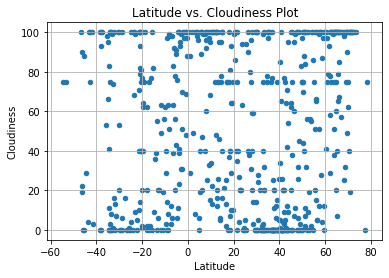

<Figure size 432x288 with 0 Axes>

In [83]:
weather_df.plot(kind = "scatter", x = "Lat", y = "Cloudiness",grid=True)
plt.title("Latitude vs. Cloudiness Plot")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()
plt.savefig("Latitude_vs_Cloudiness_Plot.png")

The Latitude vs. Cloudiness Plot has no relationship.

## Latitude vs. Wind Speed Plot

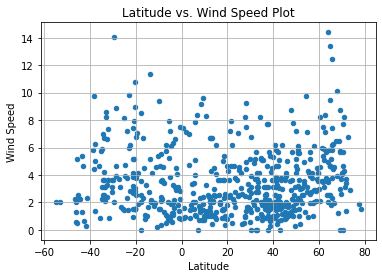

<Figure size 432x288 with 0 Axes>

In [82]:
weather_df.plot(kind = "scatter", x = "Lat", y = "Wind Speed", grid=True)
plt.title("Latitude vs. Wind Speed Plot")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()
plt.savefig("Latitude_vs_Wind_Speed_Plot.png")

The Latitude vs. Wind Speed Plot has 4 outliers at the top of the plot.

## Linear Regression

In [37]:
north_hemisphere_df = weather_df.loc[weather_df["Lat"]>= 0 ]
north_hemisphere_df


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bathsheba,13.2167,-59.5167,301.49,83,75,6.69,BB,1661823863
1,Kalmunai,7.4167,81.8167,300.81,73,99,1.75,LK,1661823863
2,Ribeira Grande,38.5167,-28.7000,296.80,88,12,0.74,PT,1661823863
8,Hyères,43.1167,6.1167,297.42,79,0,0.00,FR,1661823865
14,Kulhudhuffushi,6.6221,73.0700,300.48,80,99,8.38,MV,1661823867
...,...,...,...,...,...,...,...,...,...
578,Chapais,49.7834,-74.8492,292.03,99,97,1.43,CA,1661824060
579,Muros,42.7762,-9.0603,290.84,90,64,2.48,ES,1661824061
580,Chu,43.5983,73.7614,293.15,29,0,1.87,KZ,1661824061
581,Pindi Gheb,33.2402,72.2661,301.93,67,0,3.46,PK,1661824061


In [38]:
south_hemisphere_df = weather_df.loc[weather_df["Lat"] < 0 ]
south_hemisphere_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,Mar del Plata,-38.0023,-57.5575,283.08,69,0,6.26,AR,1661823613
4,Hobart,-42.8794,147.3294,286.07,95,75,4.63,AU,1661823679
5,Mataura,-46.1927,168.8643,287.30,50,19,2.02,NZ,1661823864
6,Rikitea,-23.1203,-134.9692,296.28,83,9,5.99,PF,1661823865
7,Airai,-8.9266,125.4092,297.66,43,8,2.13,TL,1661823865
...,...,...,...,...,...,...,...,...,...
567,Malangali,-8.5667,34.8500,286.96,76,0,3.64,TZ,1661824057
568,Pangai,-19.8000,-174.3500,299.21,65,40,2.57,TO,1661824057
569,Fuerte Olimpo,-21.0415,-57.8738,291.88,34,100,3.86,PY,1661824058
572,Pemba,-12.9740,40.5178,295.54,83,20,2.06,MZ,1661824058


In [41]:
slope_north = []
slope_south = []
intercept_north = []
intercept_south = []
r_value_north = []
r_value_south = []
regression_north = []
regression_south = []
column_name = ("Max Temp", "Humidity", "Cloudiness", "Wind Speed")
for names in column_name:
    #looping through north hemisphere
    x_axis_north = north_hemisphere_df['Lat']
    y_axis_north = north_hemisphere_df[names]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_north, y_axis_north)
    regression_north_loop = x_axis_north * slope + intercept
    r_sq_n = rvalue**2
    slope_north.append(slope)
    intercept_north.append(intercept)
    r_value_north.append(r_sq_n)
    regression_north.append(regression_north_loop)
    
for names in column_name:
    #looping through south hemisphere
    x_axis_south = south_hemisphere_df['Lat']
    y_axis_south = south_hemisphere_df[names]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_south, y_axis_south)
    regression_south_loop = x_axis_south * slope + intercept
    r_sq_s = rvalue**2
    slope_south.append(slope)
    intercept_south.append(intercept)
    r_value_south.append(r_sq_s)
    regression_south.append(regression_south_loop)

In [51]:
hemisphere_north_df = pd.DataFrame(
    {"North Slope": slope_north,
    "North Intercepts": intercept_north,
    "North R Squared": r_value_north,
    "column_name":['Max Temp','Humidity','Cloudiness','Wind Speed']
     })

hemisphere_south_df = pd.DataFrame(
    {"South Slope": slope_south,
    "South Intercepts": intercept_south,
    "South R Squared": r_value_south,
    "column_name":['Max Temp','Humidity','Cloudiness','Wind Speed']
     })


In [52]:
hemisphere_north_df.set_index('column_name')

,North Slope,North Intercepts,North R Squared
column_name,,,
Max Temp,-0.301543,305.350964,0.566772
Humidity,-0.052578,73.488178,0.002377
Cloudiness,0.205249,42.764041,0.009561
Wind Speed,0.026853,2.298740,0.051016


In [53]:
hemisphere_south_df.set_index('column_name')

,South Slope,South Intercepts,South R Squared
column_name,,,
Max Temp,0.384466,299.407430,0.570854
Humidity,0.230399,73.317940,0.023993
Cloudiness,0.222182,54.322360,0.005602
Wind Speed,-0.013721,3.351038,0.005289


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value of Northern Hemisphere - Max Temp vs. Latitude is 0.5667719105197434


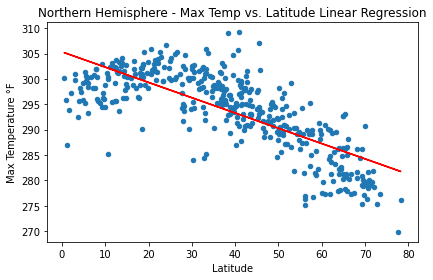

<Figure size 432x288 with 0 Axes>

In [69]:
north_hemisphere_df.plot.scatter(x = "Lat", y = "Max Temp")


print(f'The r-value of Northern Hemisphere - Max Temp vs. Latitude is {r_value_north[0]}')

plt.xlabel("Latitude")
plt.ylabel("Max Temperature °F")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
line_equation = "y = " + str(round(slope_north[0], 2)) + "x + " + str(round(intercept_north[0], 2))
plt.annotate(line_equation, (10,50), color = "red")
plt.plot(x_axis_north, regression_north[0], "red")
plt.tight_layout()
plt.show()
plt.savefig('Northern_Hemisphere_Latitude_vs_Temperature_Linear_Regression.png')

The Northern Hemisphere Max Temp vs. Latitude Linear Regression shows a negative coorelation. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value of Southern Hemisphere - Max Temp vs. Latitude is 0.5708537955542231


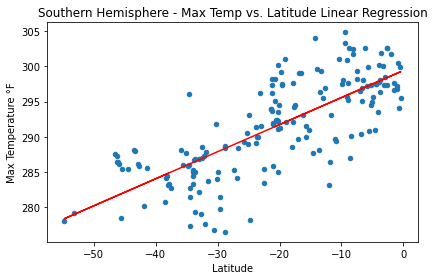

<Figure size 432x288 with 0 Axes>

In [72]:
south_hemisphere_df.plot.scatter(x = "Lat", y = "Max Temp")

print(f'The r-value of Southern Hemisphere - Max Temp vs. Latitude is {r_value_south[0]}')

plt.xlabel("Latitude")
plt.ylabel("Max Temperature °F")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
#converting slope into a string and rounding its value to 2 decimal places to make it easier to read on the graph
line_equation = "y = " + str(round(slope_south[0], 2)) + "x + " + str(round(intercept_south[0], 2))
plt.annotate(line_equation, (-50,70), color = "red")
plt.plot(x_axis_south, regression_south[0], "red")
plt.tight_layout()
plt.show()
plt.savefig('Southern_Hemisphere_Latitude_vs_Temperature_Linear_Regression.png')

The Southern Hemisphere Max Temp vs. Latitude Linear Regression shows a positive coorelation. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value of Northern Hemisphere - Humidity vs. Latitude is 0.002376780887675337


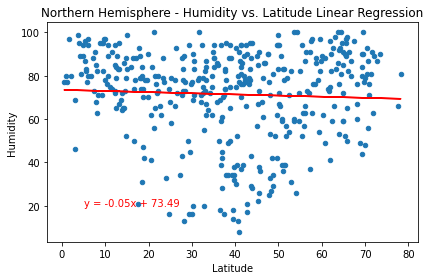

<Figure size 432x288 with 0 Axes>

In [66]:
north_hemisphere_df.plot.scatter(x = "Lat", y = "Humidity")

#prints the r-value of this line
print(f'The r-value of Northern Hemisphere - Humidity vs. Latitude is {r_value_north[1]}')

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")
line_equation = "y = " + str(round(slope_north[1], 2)) + "x + " + str(round(intercept_north[1], 2))
plt.annotate(line_equation, (5,20), color = "red")
plt.plot(x_axis_north, regression_north[1], "red")
plt.tight_layout()
plt.show()
plt.savefig('North_Humidity_vs_Latitude_Linear_Regression.png')

The Southern Hemisphere Cloudiness vs. Latitude Linear Regression shows no coorelation. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value of Southern Hemisphere - Humidity vs. Latitude is 0.02399314005809527


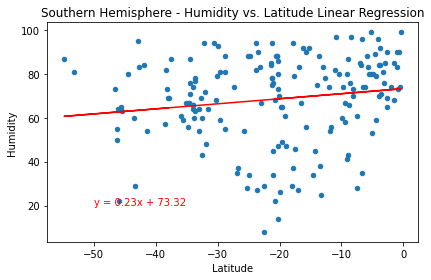

<Figure size 432x288 with 0 Axes>

In [73]:
south_hemisphere_df.plot.scatter(x = "Lat", y = "Humidity")


print(f'The r-value of Southern Hemisphere - Humidity vs. Latitude is {r_value_south[1]}')

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")
line_equation = "y = " + str(round(slope_south[1], 2)) + "x + " + str(round(intercept_south[1], 2))
plt.annotate(line_equation, (-50,20), color = "red")
plt.plot(x_axis_south, regression_south[1], "red")
plt.tight_layout()
plt.show()
plt.savefig('South_Humidity_vs_Latitude_Linear_Regression.png')

The Southern Hemisphere Humidity vs. Latitude Linear Regression shows a slight positive correlation. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value of Northern Hemisphere - Cloudiness vs. Latitude is 0.009561386953880816


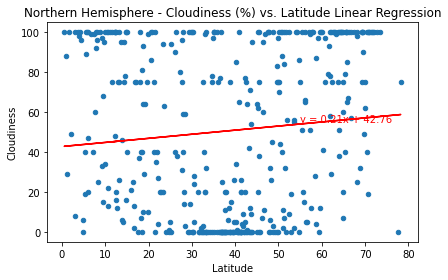

<Figure size 432x288 with 0 Axes>

In [76]:
north_hemisphere_df.plot.scatter(x = "Lat", y = "Cloudiness", )

print(f'The r-value of Northern Hemisphere - Cloudiness vs. Latitude is {r_value_north[2]}')

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
line_equation = "y = " + str(round(slope_north[2], 2)) + "x + " + str(round(intercept_north[2], 2))
plt.annotate(line_equation, (55,55), color = "red")
plt.plot(x_axis_north, regression_north[2], "red")
plt.tight_layout()
plt.show()
plt.savefig('Northern_Cloudiness_vs_Latitude_Linear_Regression.png')

The Northern Hemisphere Cloudiness vs. Latitude Linear Regression shows a slight positive correlation. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value of Southern Hemisphere - Cloudiness vs. Latitude is 0.005601828723170394


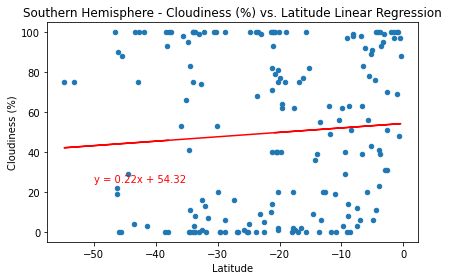

<Figure size 432x288 with 0 Axes>

In [77]:
south_hemisphere_df.plot.scatter(x = "Lat", y = "Cloudiness")

#prints the r-value of this line
print(f'The r-value of Southern Hemisphere - Cloudiness vs. Latitude is {r_value_south[2]}')

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
line_equation = "y = " + str(round(slope_south[2], 2)) + "x + " + str(round(intercept_south[2], 2))
plt.annotate(line_equation, (-50,25), color = "red")
plt.plot(x_axis_south, regression_south[2], "red")
plt.tight_layout()
plt.show()
plt.savefig('Southern_Cloudiness_vs_Latitude_Linear_Regression.png')

The Southern Hemisphere Cloudiness vs. Latitude Linear Regression shows a slight positive correlation. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value of Northern Hemisphere - Wind Speed vs. Latitude is 0.05101607729868074


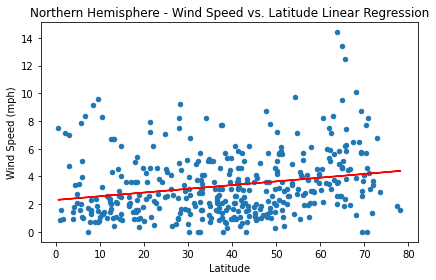

<Figure size 432x288 with 0 Axes>

In [79]:
north_hemisphere_df.plot.scatter(x = "Lat", y = "Wind Speed")


print(f'The r-value of Northern Hemisphere - Wind Speed vs. Latitude is {r_value_north[3]}')

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")
line_equation = "y = " + str(round(slope_north[3], 2)) + "x + " + str(round(intercept_north[3], 2))
plt.annotate(line_equation, (50,25), color = "red")
plt.plot(x_axis_north, regression_north[3], "red")
plt.tight_layout()
plt.show()
plt.savefig('Northern_Wind_Speed_vs_Latitude_Linear_Regression.png')

The Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression shows no coorelation. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value of Southern Hemisphere - Wind Speed vs. Latitude is 0.005289207052970684


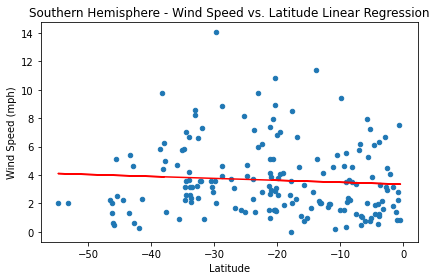

<Figure size 432x288 with 0 Axes>

In [81]:
south_hemisphere_df.plot.scatter(x = "Lat", y = "Wind Speed")

print(f'The r-value of Southern Hemisphere - Wind Speed vs. Latitude is {r_value_south[3]}')

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")
line_equation = "y = " + str(round(slope_south[3], 2)) + "x + " + str(round(intercept_south[3], 2))
plt.annotate(line_equation, (-50,23), color = "red")
plt.plot(x_axis_south, regression_south[3], "red")
plt.tight_layout()
plt.show()
plt.savefig('Southern_Wind_Speed_vs_Latitude_Linear_Regression.png')


The Southern Hemisphere Wind Speed (mph) vs. Latitude Linear Regression shows no coorelation. 